In [74]:
# Importing data libraries
import numpy as np
import pandas as pd
# Practical
import warnings
warnings.simplefilter("ignore")  #ignoring the warnings

### About the Data

In [75]:
df=pd.read_excel('sat.xls')        #read xls file
#df=pd.read_csv('diamonds.csv')     #read csv file

In [76]:
#DISPLAY THE FIRST 5 ROWS
df.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


This study examines the SAT and GPA information of 105 students who graduated from a state university with a B.S. in computer science. 
The question is: Using the grades and test scores from high school, can you predict a student's college grades?

<b>Descriptions of Variables</b>

SAT: Scholastic Assessment Test

GPA: Grade Point Average


- high_GPA:	High school grade point average
- math_SAT:	Math SAT score
- verb_SAT:	Verbal SAT score
- comp_GPA: Computer science grade point average
- univ_GPA:	Overall university grade point average


In [77]:
#CHEKING HOW MANY ROWS AND COLUMNS DF HAS
df.shape

(105, 5)

In [78]:
#GETTING DF INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high_GPA  105 non-null    float64
 1   math_SAT  105 non-null    int64  
 2   verb_SAT  105 non-null    int64  
 3   comp_GPA  105 non-null    float64
 4   univ_GPA  105 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.2 KB


In [79]:
#Find the missing values from each column
#df.isnull().sum()
#Example:
df.isnull().sum()

high_GPA    0
math_SAT    0
verb_SAT    0
comp_GPA    0
univ_GPA    0
dtype: int64

#### 1- We do not have any null values. What if we have?

- Deleting the Missing values
- Imputing the Missing Values

#### 2- We do not have any categorical values in our data set. If we have categorical values what do we do?

<b> Dummy Coding 

- Seperate the categorical and numerical values and create new dataframes
- df_cat = df.select_dtypes('object')
- df_num = df.select_dtypes('number')
- df_dummy =pd.get_dummies(df_cat, drop_first=True)

   
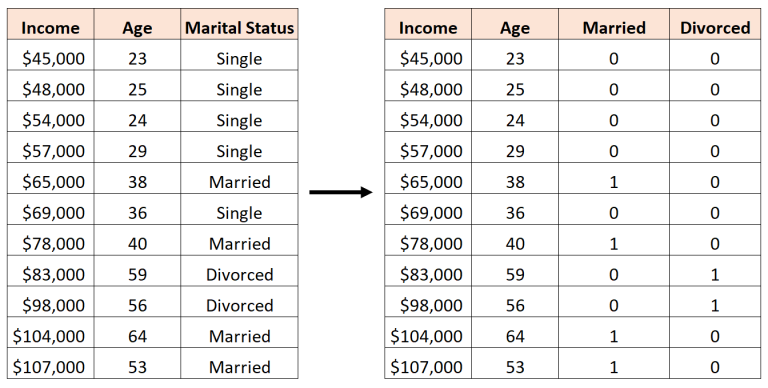


In [80]:
df.describe()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,3.076381,623.076190,598.600000,3.128000,3.172857
std,0.516598,53.760454,62.963604,0.509046,0.447194
min,2.030000,516.000000,480.000000,2.030000,2.080000
25%,2.670000,573.000000,548.000000,2.870000,3.010000
50%,3.170000,612.000000,591.000000,3.210000,3.290000
75%,3.480000,675.000000,645.000000,3.490000,3.470000
max,4.000000,718.000000,732.000000,4.000000,3.810000


In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

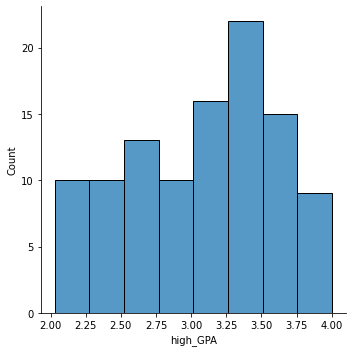

In [82]:
sns.displot(df, x="high_GPA")

<AxesSubplot:xlabel='math_SAT', ylabel='Count'>

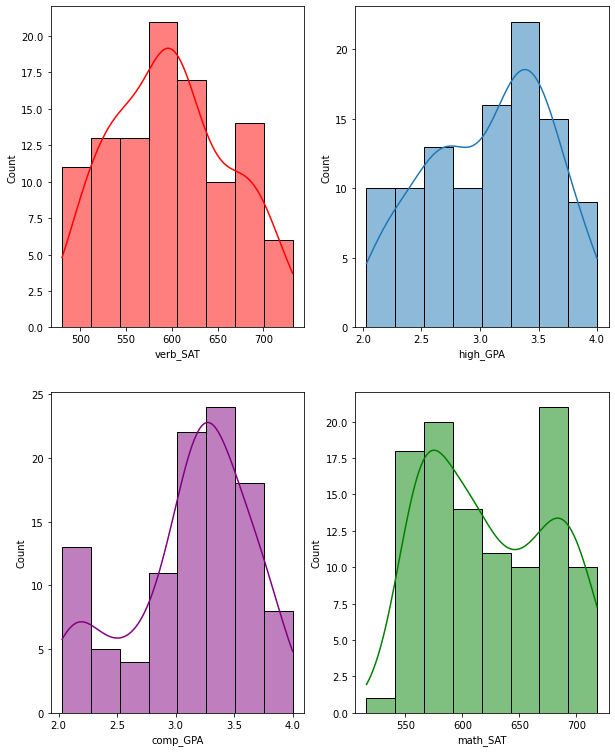

In [83]:
fig, ax = plt.subplots(2,2, figsize = (10,13))
                                         
sns.histplot(x=df['verb_SAT'], kde = True, color='red', ax=ax[0,0])
sns.histplot(x=df['high_GPA'], kde = True, ax=ax[0,1])
sns.histplot(x=df['comp_GPA'], kde = True, color='purple', ax=ax[1,0])
sns.histplot(x=df['math_SAT'], kde = True, color='green', ax=ax[1,1])


<AxesSubplot:xlabel='math_SAT'>

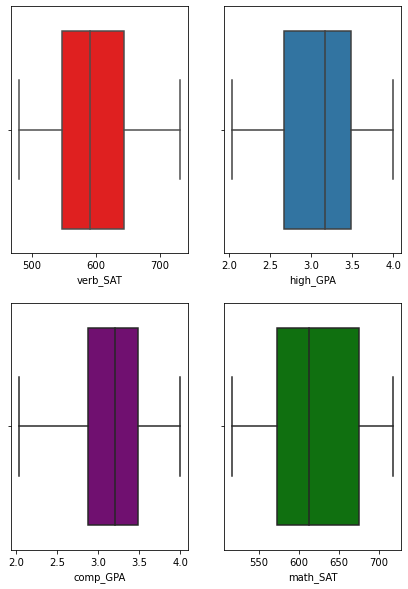

In [84]:
fig, ax = plt.subplots(2,2, figsize = (7,10))
                                         
sns.boxplot(x=df['verb_SAT'],  color='red', ax=ax[0,0])
sns.boxplot(x=df['high_GPA'],  ax=ax[0,1])
sns.boxplot(x=df['comp_GPA'],  color='purple', ax=ax[1,0])
sns.boxplot(x=df['math_SAT'],  color='green', ax=ax[1,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


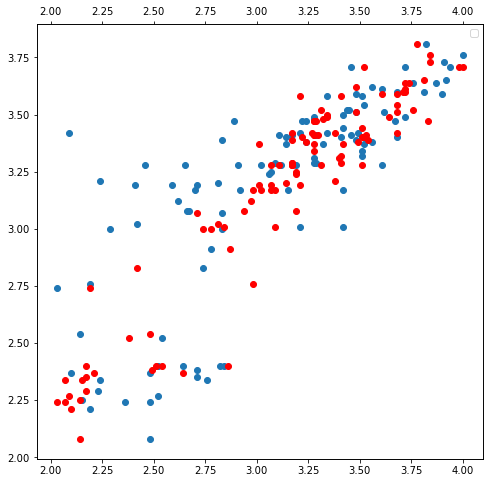

In [85]:
fig, ax = plt.subplots(figsize=(8,8))
ay = ax.twiny()
ax.scatter(df['high_GPA'], df['univ_GPA'])
ax.legend()
ay.scatter(df['comp_GPA'], df['univ_GPA'], color='r')
plt.show()

<AxesSubplot:xlabel='math_SAT', ylabel='univ_GPA'>

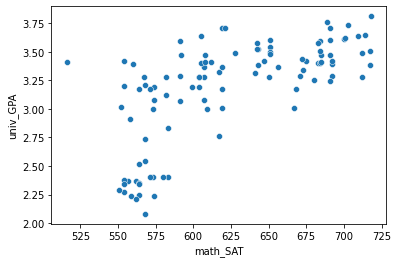

In [86]:
sns.scatterplot(data=df, x='math_SAT', y='univ_GPA')

<AxesSubplot:xlabel='verb_SAT', ylabel='univ_GPA'>

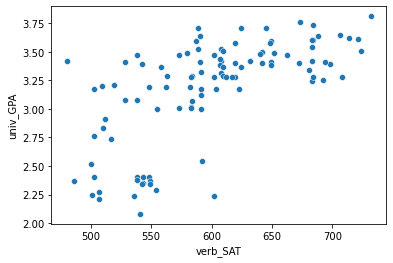

In [87]:
sns.scatterplot(data=df, x='verb_SAT', y='univ_GPA')

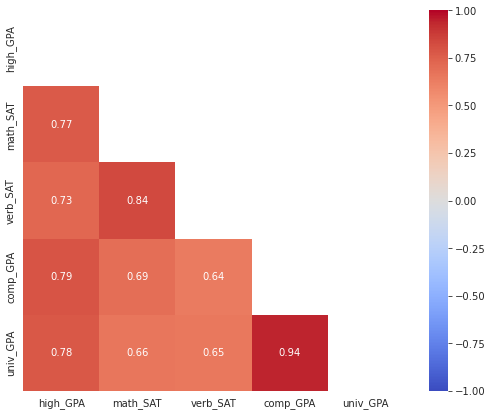

In [88]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True      
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Define X and y

In [89]:
X=df.drop('univ_GPA', axis=1)
y=df.univ_GPA

X.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA
0,3.45,643,589,3.76
1,2.78,558,512,2.87
2,2.52,583,503,2.54
3,3.67,685,602,3.83
4,3.24,592,538,3.29


### Splitting the data into train and test

In [90]:
#import the necessary library
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=123)

X_train.shape

(73, 4)

In [92]:
X_train.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA
21,2.71,599,562,3.01
77,2.81,554,509,3.14
35,2.71,564,543,2.17
71,3.61,712,708,3.51
65,3.42,667,583,3.09


### Standardization of the Data

In [93]:
#Import the necessary library
from sklearn.preprocessing import StandardScaler

In [94]:
scaler=StandardScaler().fit(X_train) # we want to apply the exact same scaling as for your training data. 
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [95]:
X_train_sc

array([[-0.66135251, -0.42965375, -0.52096577, -0.07889542],
       [-0.45968696, -1.25407698, -1.38864403,  0.17751468],
       [-0.66135251, -1.07087182, -0.83202024, -1.73569913],
       [ 1.15363747,  1.64056459,  1.86924224,  0.90729727],
       [ 0.77047292,  0.81614135, -0.17716873,  0.07889542],
       [-0.74201873, -0.88766666, -0.91387668,  0.27613395],
       [-1.71001339, -0.09988446, -1.48687175, -0.13806698],
       [ 0.9116388 ,  1.27415426,  1.45996005,  0.43392478],
       [ 1.05280469,  1.73216717,  0.90333626,  0.86784957],
       [-0.90335118, -0.33805117, -0.19354002,  0.31558166],
       [ 0.10497659, -0.57621788, -0.16079744,  0.23668625],
       [ 0.26630903, -0.19148704, -0.06256972,  0.49309634],
       [ 0.36714181,  1.25583374,  1.116163  ,  0.45364864],
       [-0.41935385, -0.24644859, -0.63556479, -0.53254405],
       [-0.52018663, -1.18079492, -1.33953016, -0.35502937],
       [-0.23785485, -1.07087182, -0.04619843,  0.07889542],
       [-1.81084617, -0.

### Logistic Regression

In [96]:
#Import the necessary library
from sklearn.linear_model import LinearRegression

In [97]:
#Modelling using sklearn
model = LinearRegression()
model.fit(X_train_sc, y_train) 

LinearRegression()

In [98]:
model.intercept_

3.1186301369863023

In [99]:
model.coef_

array([ 0.02524818, -0.05579917,  0.05440528,  0.40334421])

<b> Now we are predicting

In [100]:
y_pred=model.predict(X_test_sc)   # model prediction
y_pred_train = model.predict(X_train_sc)

In [101]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
53,2.38,2.676681
28,3.58,3.247657
63,3.64,3.689422
99,2.08,2.374888
93,3.28,3.277153
90,3.42,3.540157
8,3.02,2.958616
5,2.37,2.710460
0,3.52,3.679151
62,3.41,3.577248


#### Making the Seaborn Residual plot

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

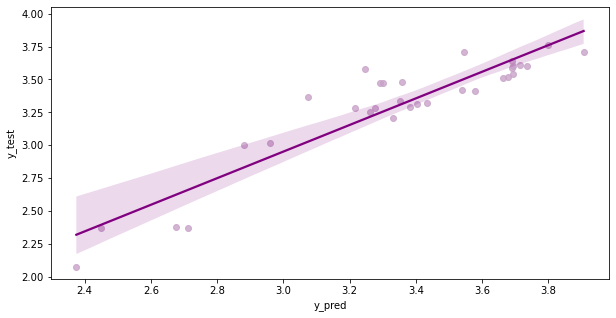

In [102]:
plt.figure(figsize=(10,5))
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "#C8A2C8"}, line_kws={"color": "purple"})

#### Get the Error

In [103]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [104]:
Test_R2=r2_score(y_test,y_pred)
Test_R2

0.8452486058436366

In [105]:
Train_R2=r2_score(y_train,y_pred_train)
Train_R2

0.8980155948409542

In [106]:
MAE = mae(y_train,y_pred_train)
MAE

0.11085182053147788

In [107]:
MSE = mse(y_train,y_pred_train)
MSE

0.020220661778158476

In [108]:
#X_train=pd.DataFrame(X_train, columns=X_train.columns,index=X_train.index)
#X_train

### Without the standardization

In [109]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [110]:
model.intercept_

0.6449250750755162

In [111]:
y_pred1=model.predict(X_test)   # model prediction
y_pred_train1=model.predict(X_train)

In [112]:
Test_R2_1=r2_score(y_test,y_pred1)
Test_R2_1

0.8452486058436361

In [113]:
Train_R2_1=r2_score(y_train,y_pred_train1)
Train_R2_1

0.8980155948409543

#### Compare standardized and not standardized results

In [115]:
print("r2_test for Standardized:", Test_R2_1)
print("r2_test for not Standardized:", Test_R2)

r2_test for Standardized: 0.8452486058436361
r2_test for not Standardized: 0.8452486058436366


In [77]:
# magnitude is important, I am checking which one is effecting my model most

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
3,comp_GPA,0.403344
1,math_SAT,0.055799
2,verb_SAT,0.054405
0,high_GPA,0.025248


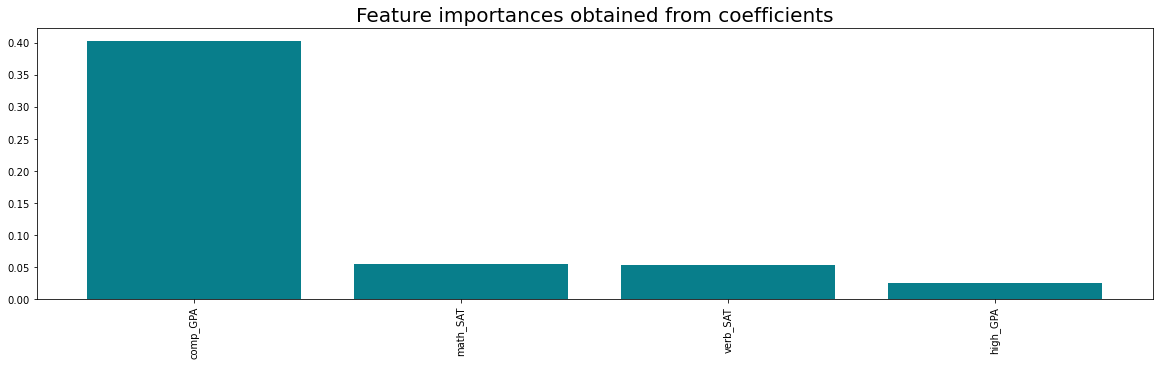

In [78]:
plt.figure(figsize=(20,5)) # this one I add to make it smaller
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()